In [56]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [58]:
cry_wav = "C:/Users/Carlita/Desktop/tesis/Experiment 1 chunks/crying/freesound_crying_1.wav"

In [59]:
ipd.Audio(cry_wav)

In [60]:
cry_wav, sr = librosa.load(cry_wav)

In [61]:
cry_wav.shape

(213248,)

In [62]:
# duration in seconds of 1 sample
sample_duration = 1 / sr #sr es sample rate
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [63]:
# total number of samples in audio file
tot_samples = len(cry_wav)
tot_samples

213248

In [64]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 9.671111111111111 seconds


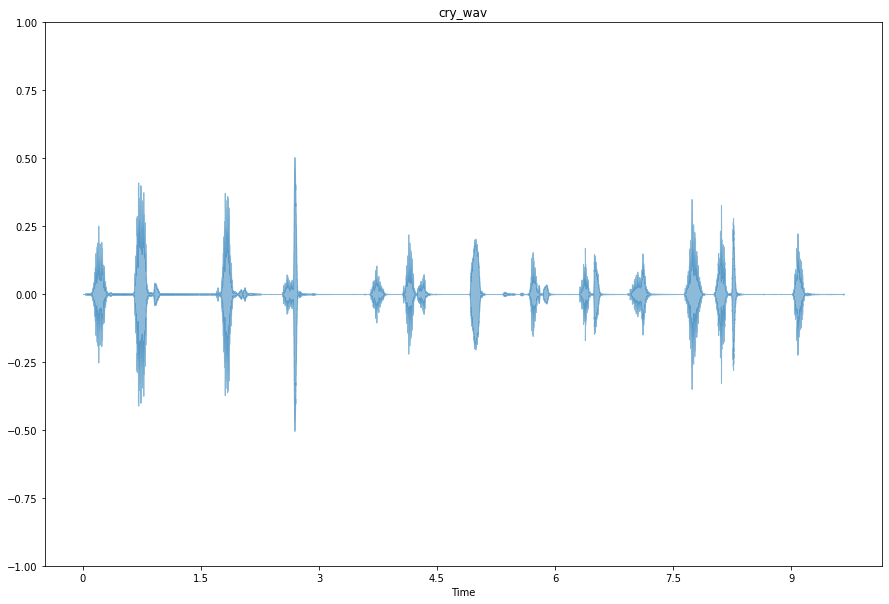

In [72]:
plt.figure(figsize=(15, 10))
librosa.display.waveshow(cry_wav, sr=sr,alpha=0.5)
plt.ylim((-1, 1))
plt.title("cry_wav")
plt.show()

In [73]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) #Valor máximo
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)    

In [74]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [78]:
# number of frames in amplitude envelope
ae_cry_wav = amplitude_envelope(cry_wav, FRAME_SIZE, HOP_LENGTH)
len(ae_cry_wav)

417

In [79]:
frames = range(len(ae_cry_wav))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

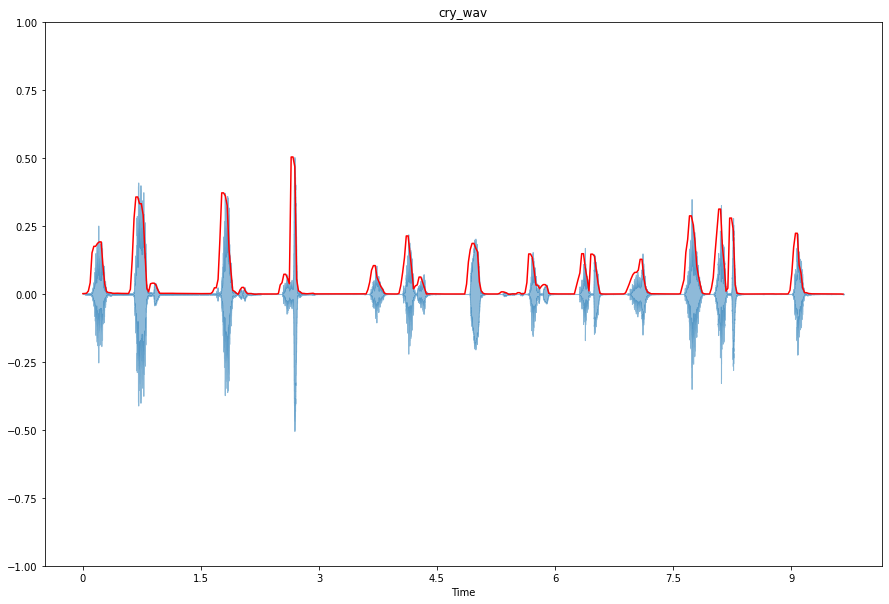

In [80]:
plt.figure(figsize=(15, 10))
librosa.display.waveshow(cry_wav, sr=sr,alpha=0.5)
plt.plot(t, ae_cry_wav, color="r")
plt.ylim((-1, 1))
plt.title("cry_wav")
plt.show()